Importing Pandas Library

In [136]:
import pandas as pd

Mounting Google Drive for data access

In [137]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Reading csv file from drive

In [138]:
cab_data=pd.read_csv('/content/drive/MyDrive/Cab_Data.csv')

Converting date into proper format using datetime method

In [139]:
cab_data['Date of Travel'] = pd.to_datetime(cab_data['Date of Travel'],unit = 'D',origin = '1899-12-30')

In [140]:
cab_data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776


Displaying information of cab_data dataframe

In [141]:
cab_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Transaction ID  359392 non-null  int64         
 1   Date of Travel  359392 non-null  datetime64[ns]
 2   Company         359392 non-null  object        
 3   City            359392 non-null  object        
 4   KM Travelled    359392 non-null  float64       
 5   Price Charged   359392 non-null  float64       
 6   Cost of Trip    359392 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(2)
memory usage: 19.2+ MB


In [142]:
city=pd.read_csv('/content/drive/MyDrive/City.csv')

In [143]:
cab_data['Profit'] = cab_data['Price Charged']-cab_data['Cost of Trip']

In [144]:
cab_data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635,57.315
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854,23.666
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632,27.568
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602,25.798
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776,16.844


Counting percentage of pink cab and yelloy cab transactions from the data and displaying using pie chart

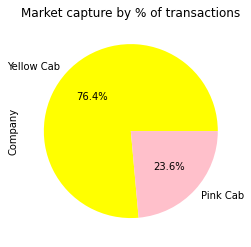

In [145]:
cab_data['Company'].value_counts().plot(kind='pie', autopct='%1.1f%%', title='Market capture by % of transactions', colors=['yellow', 'pink'])

Calculating the total profit of pink cab and yellow cab

In [146]:
profit_pink = cab_data.loc[cab_data['Company']=='Pink Cab', 'Profit'].sum()
profit_yellow = cab_data.loc[cab_data['Company']=='Yellow Cab', 'Profit'].sum()
profit_pink, profit_yellow

(5307328.321, 44020373.17080001)

The profit of yellow cab is more than 8 times that of pink cab

In [147]:
profit_yellow/profit_pink

8.294262293256006

Converting population and users into integer and replacing commmas from the data

In [148]:
city[['Population', 'Users']]=city[['Population', 'Users']].replace(',','', regex=True)

In [149]:
city['Population']=city['Population'].astype(int)
city['Users']=city['Users'].astype(int)

In [150]:
city.head()

,City,Population,Users
0,NEW YORK NY,8405837,302149
1,CHICAGO IL,1955130,164468
2,LOS ANGELES CA,1595037,144132
3,MIAMI FL,1339155,17675
4,SILICON VALLEY,1177609,27247


In [151]:
city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     int64 
 2   Users       20 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 608.0+ bytes


In [152]:
cust_id=pd.read_csv('/content/drive/MyDrive/Customer_ID.csv')

In [153]:
cust_id.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [154]:
cust_id.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


Count of male and female users of cab for all times

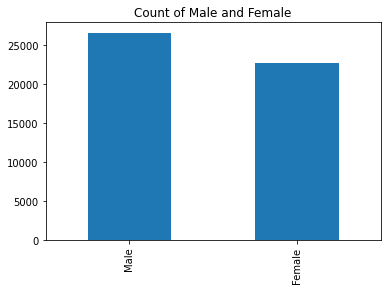

In [155]:
cust_id['Gender'].value_counts().plot(kind='bar', title='Count of Male and Female')

In [156]:
tran_id=pd.read_csv('/content/drive/MyDrive/Transaction_ID.csv')

In [157]:
tran_id.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [158]:
tran_id.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


Payment method used by all cab users

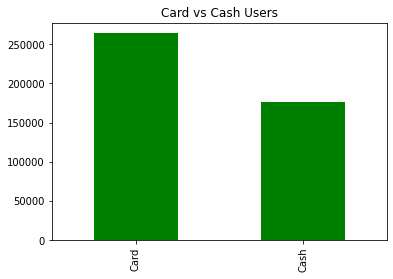

In [159]:
tran_id['Payment_Mode'].value_counts().plot(kind='bar', title='Card vs Cash Users', color='green')

Merging all pandas dataframes into one single dataframe 

In [160]:
df_merged = pd.merge(city, cab_data, on='City', how='outer')
df_merged1 = pd.merge(tran_id, cust_id, on='Customer ID', how='outer')

In [161]:
df_merged.head()

,City,Population,Users,Transaction ID,Date of Travel,Company,KM Travelled,Price Charged,Cost of Trip,Profit
0,NEW YORK NY,8405837,302149,10000139.0,2016-01-08,Pink Cab,17.85,242.90,198.135,44.765
1,NEW YORK NY,8405837,302149,10000140.0,2016-01-09,Pink Cab,25.30,407.21,255.530,151.680
2,NEW YORK NY,8405837,302149,10000141.0,2016-01-06,Pink Cab,16.32,236.41,186.048,50.362
3,NEW YORK NY,8405837,302149,10000142.0,2016-01-04,Pink Cab,12.43,194.61,144.188,50.422
4,NEW YORK NY,8405837,302149,10000143.0,2016-01-09,Pink Cab,29.70,434.57,350.460,84.110


Detailed information of merged data frame

In [162]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359393 entries, 0 to 359392
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   City            359393 non-null  object        
 1   Population      359393 non-null  int64         
 2   Users           359393 non-null  int64         
 3   Transaction ID  359392 non-null  float64       
 4   Date of Travel  359392 non-null  datetime64[ns]
 5   Company         359392 non-null  object        
 6   KM Travelled    359392 non-null  float64       
 7   Price Charged   359392 non-null  float64       
 8   Cost of Trip    359392 non-null  float64       
 9   Profit          359392 non-null  float64       
dtypes: datetime64[ns](1), float64(5), int64(2), object(2)
memory usage: 30.2+ MB


In [163]:
df_merged1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 440098 entries, 0 to 440097
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   Transaction ID      440098 non-null  int64 
 1   Customer ID         440098 non-null  int64 
 2   Payment_Mode        440098 non-null  object
 3   Gender              440098 non-null  object
 4   Age                 440098 non-null  int64 
 5   Income (USD/Month)  440098 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 23.5+ MB


In [164]:
df_merged1.head()

,Transaction ID,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
0,10000011,29290,Card,Male,28,10813
1,10351127,29290,Cash,Male,28,10813
2,10412921,29290,Card,Male,28,10813
3,10000012,27703,Card,Male,27,9237
4,10320494,27703,Card,Male,27,9237


In [165]:
df_main = pd.merge(df_merged, df_merged1, on='Transaction ID', how='outer')

Removing any duplicates and null values

In [171]:
df_main = df_main.dropna()
df_main = df_main.drop_duplicates()

In [172]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359392
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   City                359392 non-null  object        
 1   Population          359392 non-null  float64       
 2   Users               359392 non-null  float64       
 3   Transaction ID      359392 non-null  float64       
 4   Date of Travel      359392 non-null  datetime64[ns]
 5   Company             359392 non-null  object        
 6   KM Travelled        359392 non-null  float64       
 7   Price Charged       359392 non-null  float64       
 8   Cost of Trip        359392 non-null  float64       
 9   Profit              359392 non-null  float64       
 10  Customer ID         359392 non-null  float64       
 11  Payment_Mode        359392 non-null  object        
 12  Gender              359392 non-null  object        
 13  Age                 359392 no

In [168]:
df_main.head()

,City,Population,Users,Transaction ID,Date of Travel,Company,KM Travelled,Price Charged,Cost of Trip,Profit,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
0,NEW YORK NY,8405837.0,302149.0,10000139.0,2016-01-08,Pink Cab,17.85,242.90,198.135,44.765,2416.0,Cash,Male,28.0,21399.0
1,NEW YORK NY,8405837.0,302149.0,10000140.0,2016-01-09,Pink Cab,25.30,407.21,255.530,151.680,2060.0,Card,Male,18.0,8149.0
2,NEW YORK NY,8405837.0,302149.0,10000141.0,2016-01-06,Pink Cab,16.32,236.41,186.048,50.362,1451.0,Card,Male,35.0,23989.0
3,NEW YORK NY,8405837.0,302149.0,10000142.0,2016-01-04,Pink Cab,12.43,194.61,144.188,50.422,1609.0,Card,Male,30.0,23036.0
4,NEW YORK NY,8405837.0,302149.0,10000143.0,2016-01-09,Pink Cab,29.70,434.57,350.460,84.110,2927.0,Cash,Male,33.0,14520.0


In [174]:
df_main.to_csv('data.csv')

Creating a correlation heatmap for the numerical data for finding relation between variables

In [169]:
# Plotting Correlation Heatmap
import plotly.graph_objs as go
import plotly.figure_factory as ff
corrs = df_main.corr()
figure = ff.create_annotated_heatmap(
    z=corrs.values,
    x=list(corrs.columns),
    y=list(corrs.index),
    annotation_text=corrs.round(2).values,
    showscale=True)
figure.show()

Finding month wise count to show which month most people use the cabs most

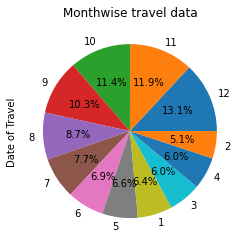

In [170]:
month_of_travel = pd.DatetimeIndex(df_main['Date of Travel']).month
month_of_travel.value_counts().plot(kind='pie', autopct='%1.1f%%', title='Monthwise travel data')

# Most of the people take cabs during the months sep, oct, nov and dec.